In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import PublicFunctions as pf

# Read

In [3]:
df = pd.read_csv('Data.csv')
df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,...,label,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,1,1,659.943271,662.441880,670.136402,660.953702,678.389332,644.368071,665.195233,...,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,2,663.045026,669.306415,681.458985,671.698166,635.332861,647.915663,672.946584,...,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,3,665.193916,665.167635,664.178329,654.500418,668.573443,661.555716,663.387867,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCL,LCL
3,0,2,1,666.417146,678.708904,643.107967,652.336760,670.809806,669.024983,638.893804,...,2.1,NaN,NaN,NaN,NaN,NaN,xbarbar,659.851365,668.5116194,651.1911113
4,0,2,2,652.628246,645.607270,651.399499,646.402698,658.448368,662.141525,652.781404,...,2.2,NaN,NaN,NaN,NaN,NaN,rangebar,32.901817,56.59112521,9.212508756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,50,6,2,664.405324,661.525038,666.668344,660.383609,651.896920,673.661267,664.597642,...,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,50,6,3,658.609150,675.067077,658.858790,657.893077,649.064135,666.165582,656.673891,...,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,50,7,1,661.382471,662.273935,645.113186,668.549637,665.918572,658.788198,661.623778,...,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,50,7,2,659.058000,648.195172,654.622342,661.076202,649.864436,656.189796,651.427319,...,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate the center lines and control limits for both x-bar and R charts

Add two columns to the data frame

In [4]:
values = df[['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12']]
# values

In [5]:
df = df.assign(Sample_ID = df['Day'] + 0.1*df['Shift'])
df['Sample_ID'] = df.Sample_ID.astype('str')
df = df.assign(xBar=values.mean(1)) # changed!
df = df.assign(R=values.max(1)-values.min(1)) # changed!
df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Sample_ID,xBar,R
0,0,1,1,659.943271,662.441880,670.136402,660.953702,678.389332,644.368071,665.195233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,658.846441,40.658346
1,0,1,2,663.045026,669.306415,681.458985,671.698166,635.332861,647.915663,672.946584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,662.290729,46.126124
2,0,1,3,665.193916,665.167635,664.178329,654.500418,668.573443,661.555716,663.387867,...,NaN,NaN,NaN,NaN,NaN,UCL,LCL,1.3,666.852622,28.765106
3,0,2,1,666.417146,678.708904,643.107967,652.336760,670.809806,669.024983,638.893804,...,NaN,NaN,NaN,xbarbar,659.851365,668.5116194,651.1911113,2.1,661.572442,40.610607
4,0,2,2,652.628246,645.607270,651.399499,646.402698,658.448368,662.141525,652.781404,...,NaN,NaN,NaN,rangebar,32.901817,56.59112521,9.212508756,2.2,658.661519,44.837860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,50,6,2,664.405324,661.525038,666.668344,660.383609,651.896920,673.661267,664.597642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,661.508605,26.039834
1067,50,6,3,658.609150,675.067077,658.858790,657.893077,649.064135,666.165582,656.673891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,661.408358,26.002942
1068,50,7,1,661.382471,662.273935,645.113186,668.549637,665.918572,658.788198,661.623778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,659.662172,27.810493
1069,50,7,2,659.058000,648.195172,654.622342,661.076202,649.864436,656.189796,651.427319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,656.863498,21.263105


In [6]:
xBar_CL = np.average(df["xBar"]) # changed!
stddev = 10
stderror = stddev / np.sqrt(len(values.columns)) # changed!
xBar_UCL = xBar_CL + 3*stderror
xBar_LCL = xBar_CL - 3*stderror
print(xBar_CL, xBar_UCL, xBar_LCL)

659.8513653606677 668.5116193985122 651.1911113228233


In [7]:
R_CL = np.average(df["R"]) 
D3 = 0.28
D4 = 1.72
R_UCL = R_CL*D4
R_LCL = R_CL*D3
print(R_CL, R_UCL, R_LCL)

32.90181698524743 56.59112521462558 9.212508755869282


# Draw the team's charts w/o marking

In [8]:
team = 24
xLabels = df[df['Team']==team]['Sample_ID']
xBarValues = df[df['Team']==team]['xBar']
RValues = df[df['Team']==team]['R']

<function matplotlib.pyplot.show(close=None, block=None)>

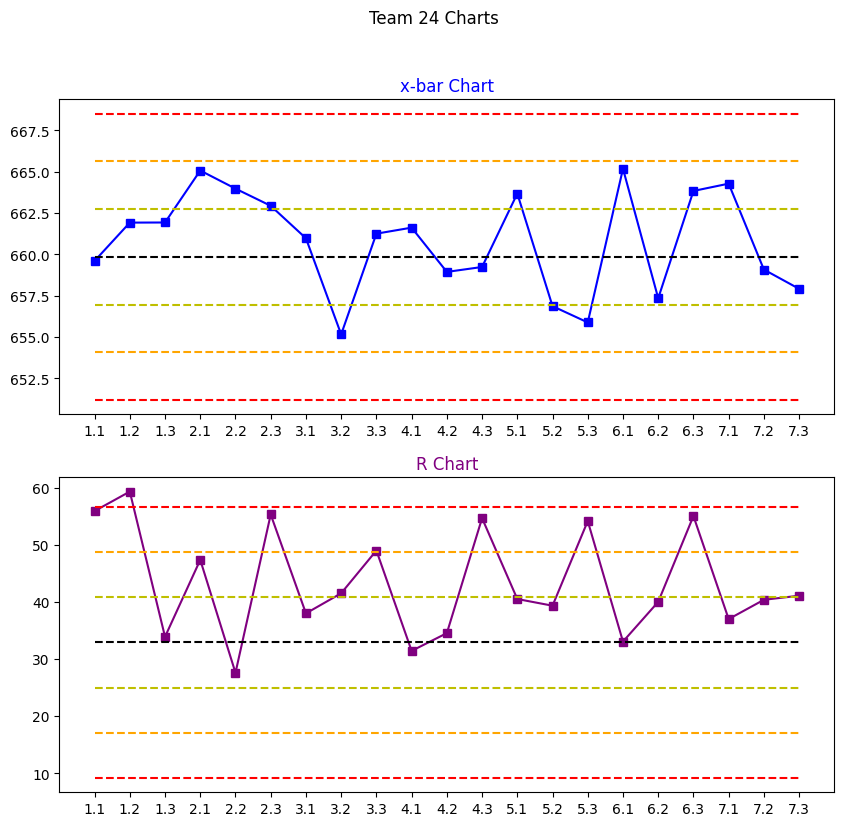

In [9]:
fig = pf.DrawCombinedxBarAndRCharts(xLabels, xBarValues, RValues, xBar_CL, xBar_UCL, xBar_LCL, R_CL, R_UCL, R_LCL)
fig.suptitle('Team ' + str(team) + ' Charts')
plt.show

# Mark any out-of-control observations and trends

Okay i just kinda gave up on this because it's not worth it––give a stab at it but I think it's easier just to do it by hand

[0, 0, 0, 1, 1, 1, 0, -1, 0, 0, 0, 0, 1, -1, -1, 1, 0, 1, 1, 0, 0] [2, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1] [2, 0, 1] 1


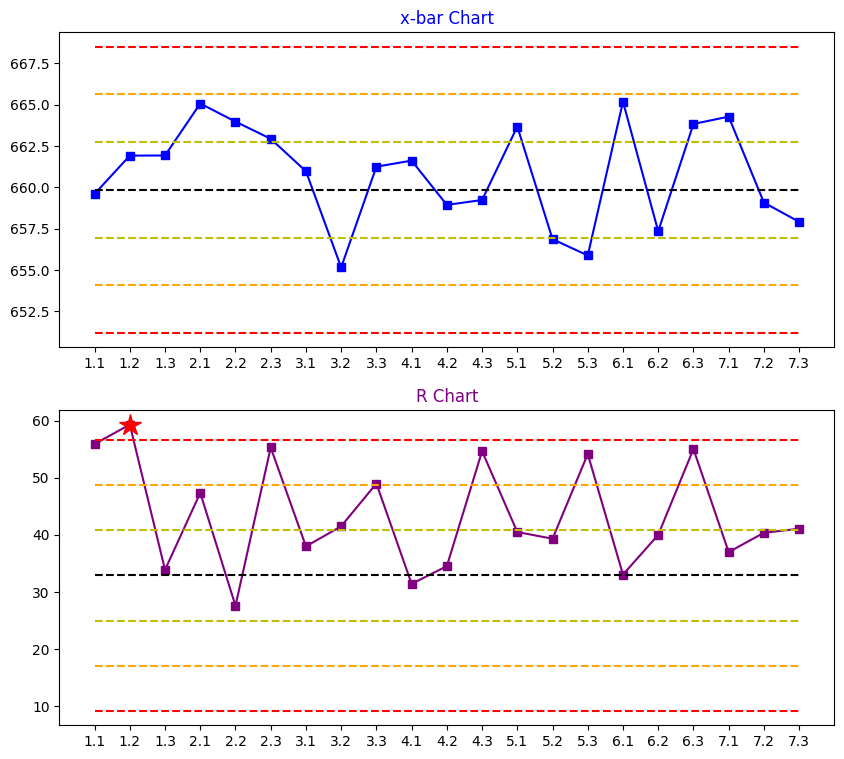

In [10]:
fig = pf.DrawCombinedxBarAndRCharts(xLabels, xBarValues, RValues, xBar_CL, xBar_UCL, xBar_LCL, R_CL, R_UCL, R_LCL)
R_CHART = fig.axes[1]
X_CHART = fig.axes[0]
pts = [[row["Sample_ID"], row["xBar"], row["R"]] for index, row in df[df['Team']==team].iterrows()]

r_upper_theta = (2*R_CL+R_UCL)/3
r_upper_2theta = (R_CL+2*R_UCL)/3
r_lower_theta = (2*R_CL+R_LCL)/3
r_lower_2theta = (R_CL+2*R_LCL)/3

x_upper_theta = xBar_CL + stderror
x_upper_2theta = xBar_CL + 2*stderror
x_lower_theta = xBar_CL - stderror
x_lower_2theta = xBar_CL - 2*stderror

x_thresh = []
r_thresh = []

for x, xbar, r in pts:    
    # check xbar
    if(xbar > xBar_UCL or xbar < xBar_LCL):
        X_CHART.scatter(x, xbar, marker="x", color="red")

    if(xbar > x_upper_2theta): x_thresh.append(2)
    elif(xbar < x_lower_2theta): x_thresh.append(-2)
    elif(xbar > x_upper_theta): x_thresh.append(1)
    elif(xbar < x_lower_theta): x_thresh.append(-1)
    else: x_thresh.append(0)

    # check R
    if(r > R_UCL or r < R_LCL):
        R_CHART.plot(x, r, marker="*", color="red", markersize=16)


    if(r > r_upper_2theta): r_thresh.append(2)
    elif(r < r_lower_2theta): r_thresh.append(-2)
    elif(r > r_upper_theta): r_thresh.append(1)
    elif(r < r_lower_theta): r_thresh.append(-1)
    else: r_thresh.append(0)
print(x_thresh, r_thresh,r_thresh[1:4],r_thresh[1:4].count(2) )

for i, res in enumerate(r_thresh):
    if res == 2 and r_thresh[i:i+4].count(2) > 2:
        for j in range(i, i+4):
            if(pts[j][2] == 2): R_CHART.plot(j, pts[j][2], marker="X", color="green", markersize=16)
    elif res == -2 and r_thresh[i: i+4].count(-2) > 2:
        for j in range(i, i+4):
            if(pts[j][2] == -2): R_CHART.plot(j, pts[j][2], marker="X", color="green", markersize=16)
    elif res == 1 and r_thresh[i: i+6].count(1) > 4:
        for j in range(i, i+6):
            if(pts[j][2] == 1): R_CHART.plot(j, pts[j][2], marker="X", color="pink", markersize=16)
    elif res == -1 and r_thresh[i: i+6].count(-1) > 4:
        for j in range(i, i+6):
            if(pts[j][2] == -1): R_CHART.plot(j, pts[j][2], marker="X", color="pink", markersize=16)


# Process Capability

In [11]:
LSL = 660 - 35
USL = 660 + 35

mu = xBar_CL

Cpk = min((USL - mu)/(3*stddev), (mu - LSL)/(3*stddev))
Cpk

1.1617121786889242